## Tesla-Stock-Prediction

Firstly, import and analyze a historical Tesla (TSLA) stock price data set and form the basis of answering the research question of this project: what can be used to predict a stock price based on historical data? Reading the data from a CSV file with the help of pandas, the data is stored in the DataFrame df_tsla, and a brief analysis of the dataset through shape and head is conducted to ensure structure and sample values. It has 363 entries and there are six important financial characteristics included: Date, Open, High, Low, Close, and Volume, and all the numerical columns are non-null and properly typed (float64). The column of Date remains in the object form, which presupposes additional preprocessing. This is important in making the set of data clean, complete and well structured prior to exploring data analysis (EDA) and modeling. It ascertains data integrity and enables the analyst to be confident to go ahead with the knowledge that he could get future trends on reliable input variables.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Load the dataset

In [8]:
df_tsla = pd.read_csv("./TSLA_2024_to_2025 2(in).csv")

In [9]:
df_tsla.shape

(363, 6)

In [10]:
df_tsla.head()

,Date,Open,High,Low,Close,Volume
0,1/2/2024,250.08,251.25,244.41,248.42,104654200.0
1,1/3/2024,244.98,245.68,236.32,238.45,121082600.0
2,1/4/2024,239.25,242.70,237.73,237.93,102629300.0
3,1/5/2024,236.86,240.12,234.90,237.49,92379400.0
4,1/8/2024,236.14,241.25,235.30,240.45,85166600.0


In [11]:
print(df_tsla.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [12]:
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    363 non-null    object 
 1   Open    363 non-null    float64
 2   High    363 non-null    float64
 3   Low     363 non-null    float64
 4   Close   363 non-null    float64
 5   Volume  363 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.1+ KB


## Exploratory data analysis

In [313]:
df_tsla.describe()

,Open,High,Low,Close,Volume
count,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,256.826639,262.832865,250.453251,256.724793,9.949118e+07
std,78.519761,80.521701,75.767917,78.147394,3.618845e+07
min,140.560000,144.440000,138.800000,142.050000,3.716760e+07
25%,189.080000,195.545000,186.105000,191.260000,7.463725e+07
50%,236.140000,244.240000,232.340000,238.010000,9.373210e+07
75%,312.755000,324.615000,297.455000,309.880000,1.154532e+08
max,475.900000,488.540000,457.510000,479.860000,2.874998e+08


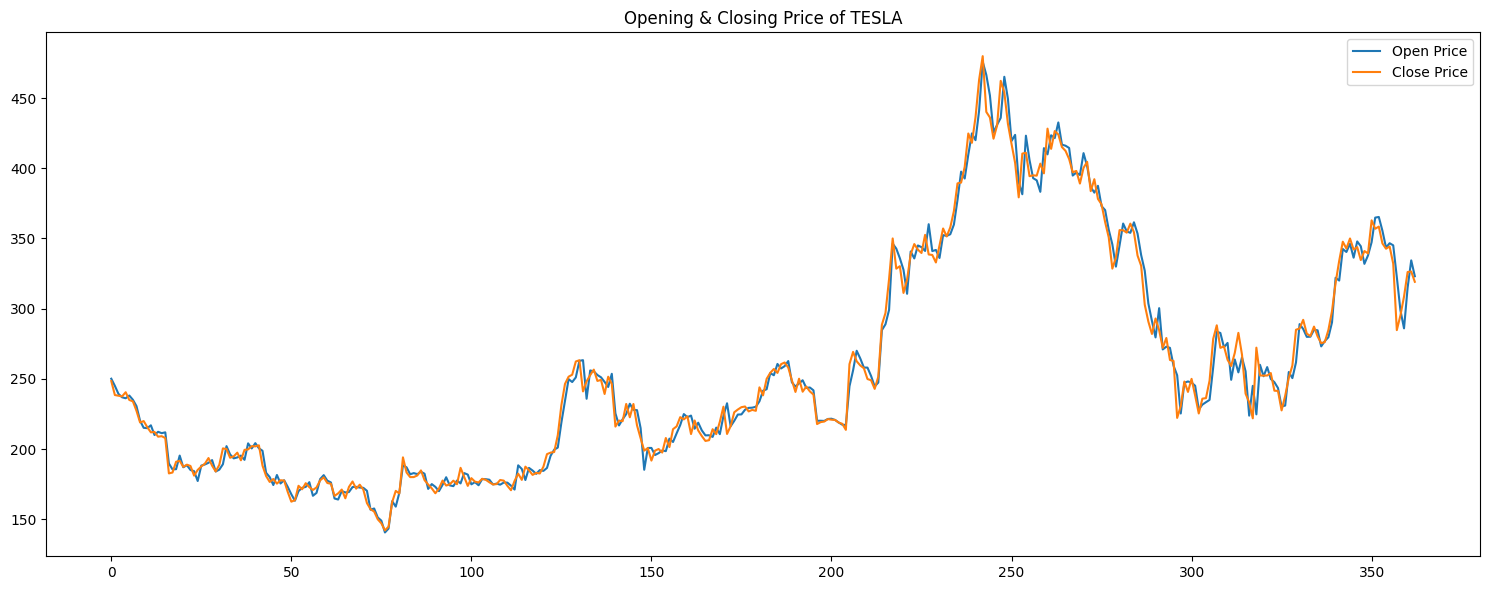

In [314]:
plt.figure(figsize=(15,6))
df_tsla['Open'].plot()
df_tsla['Close'].plot()
plt.xlabel(None)
plt.ylabel(None)
plt.title('Opening & Closing Price of TESLA')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

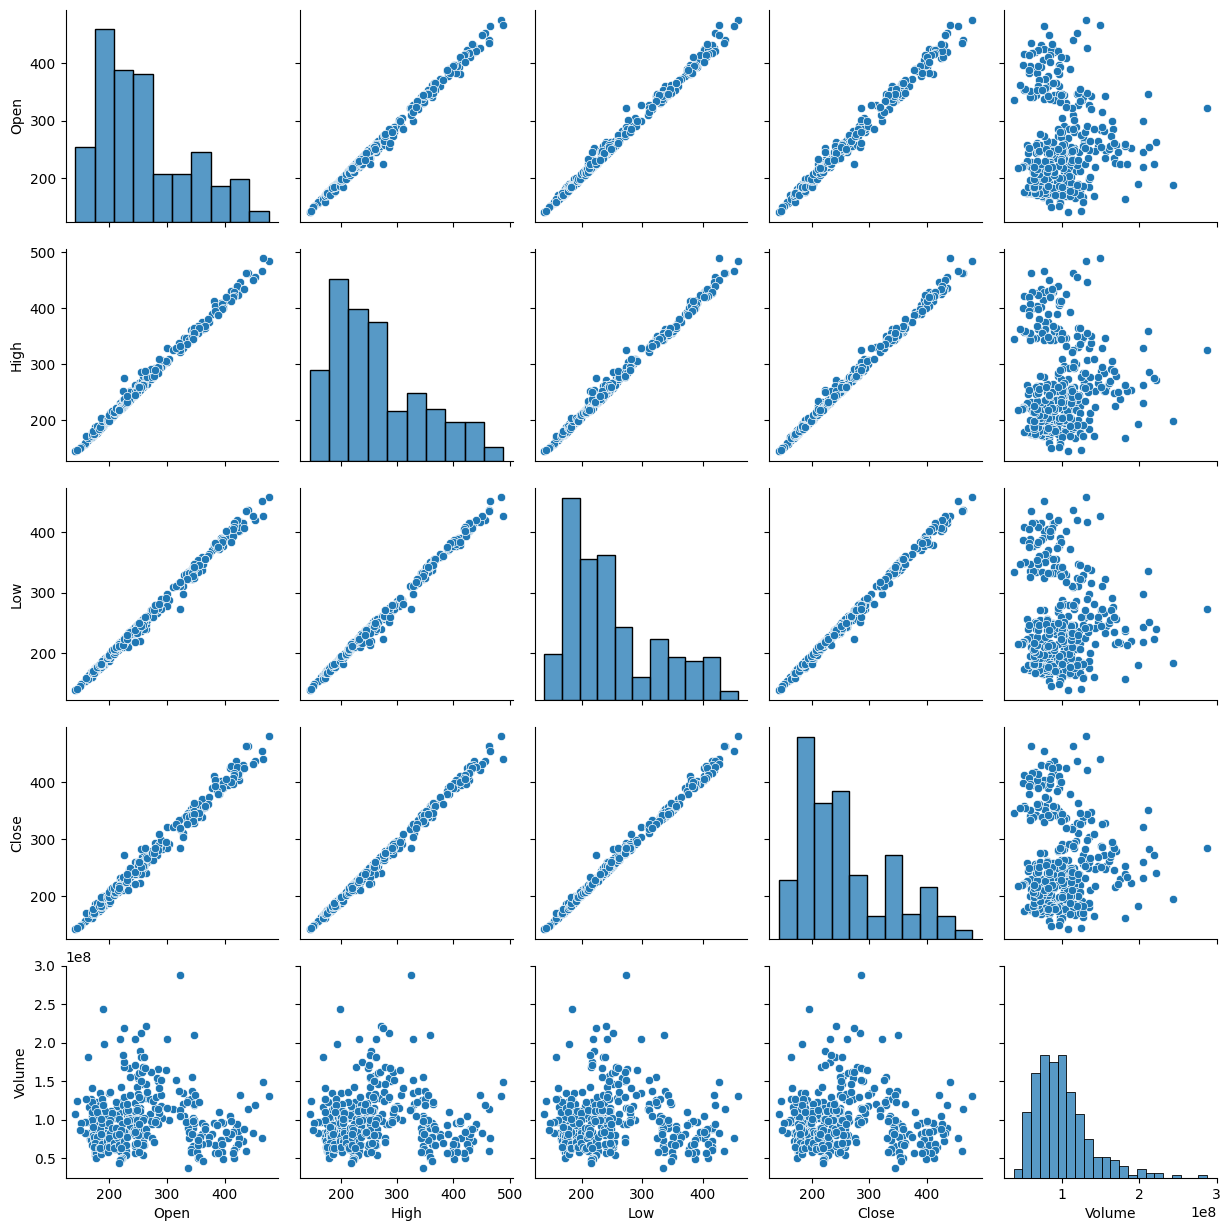

In [315]:
sns.pairplot(df_tsla)

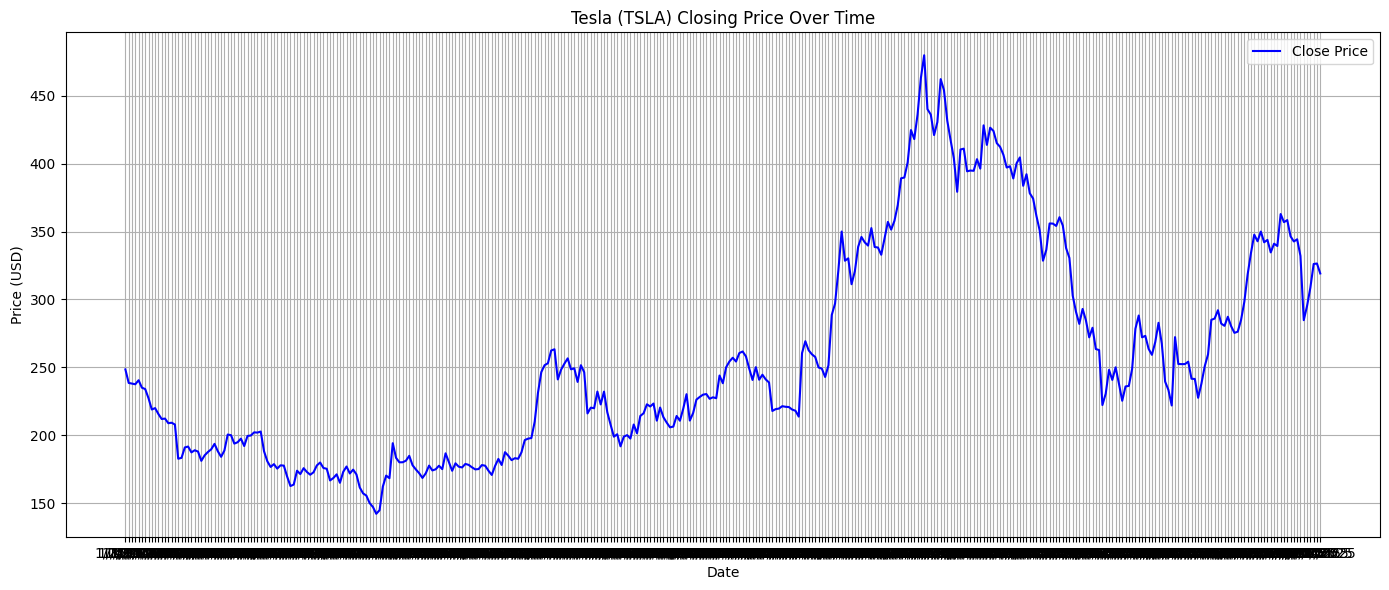

In [316]:
plt.figure(figsize=(14,6))
plt.plot(df_tsla['Date'], df_tsla['Close'], label='Close Price', color='blue')
plt.title('Tesla (TSLA) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


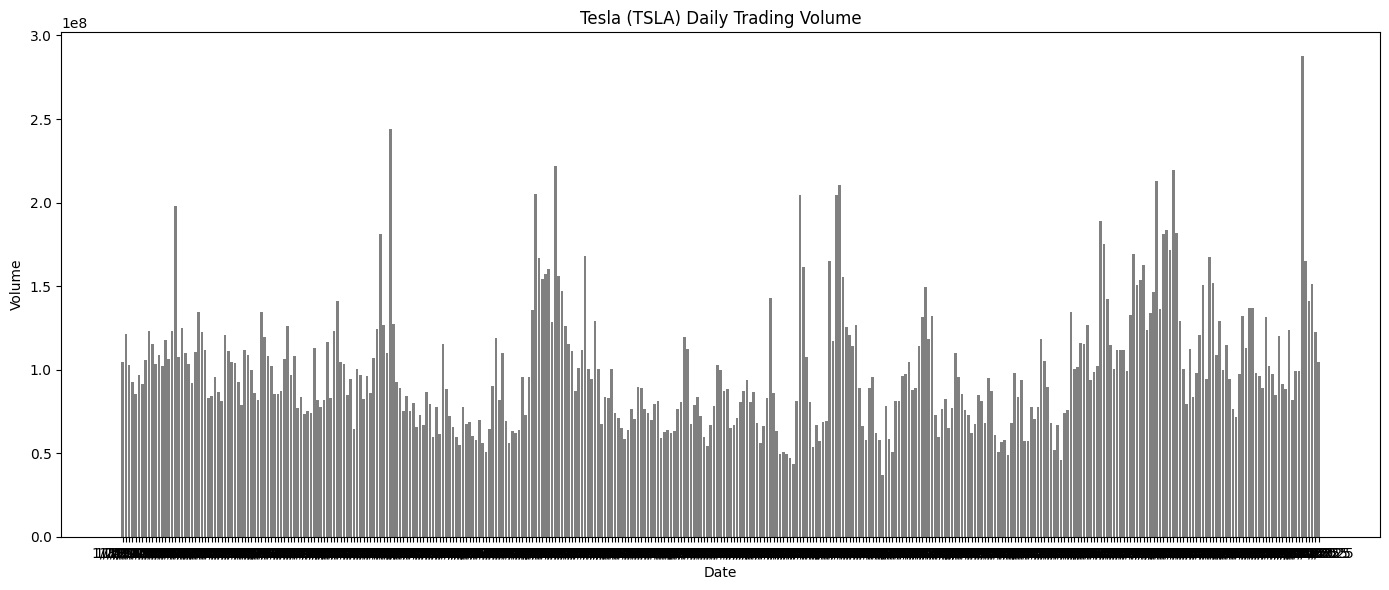

In [317]:
plt.figure(figsize=(14,6))
plt.bar(df_tsla['Date'], df_tsla['Volume'], color='gray')
plt.title('Tesla (TSLA) Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


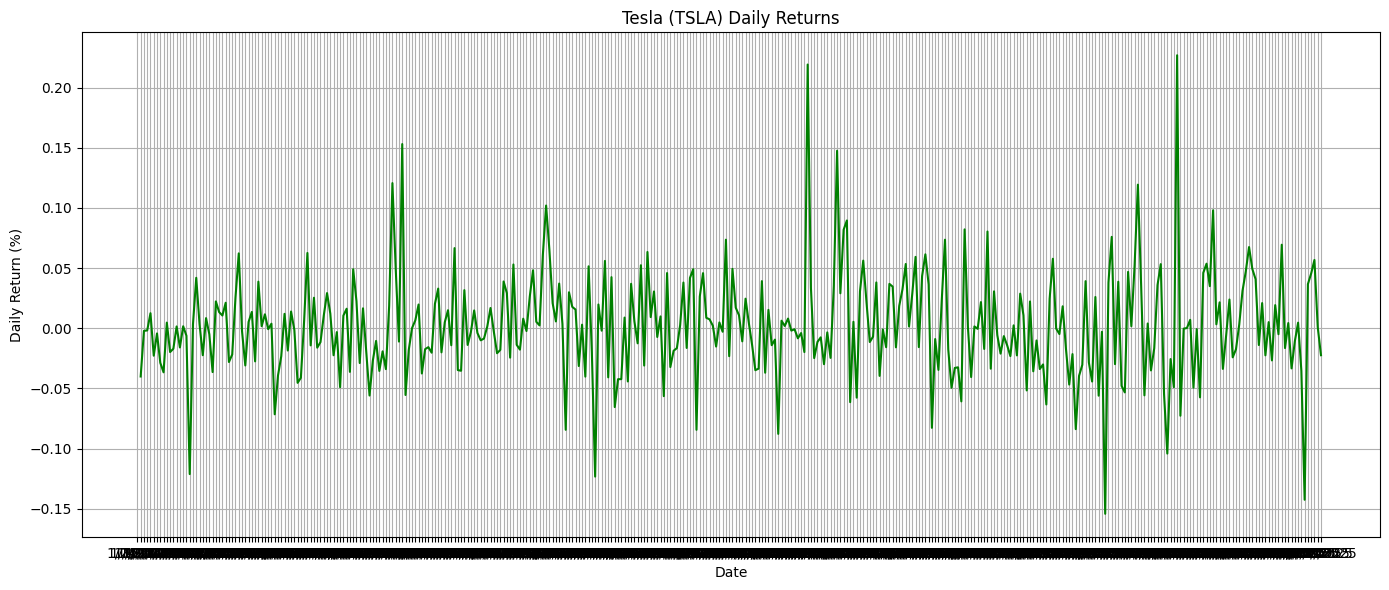

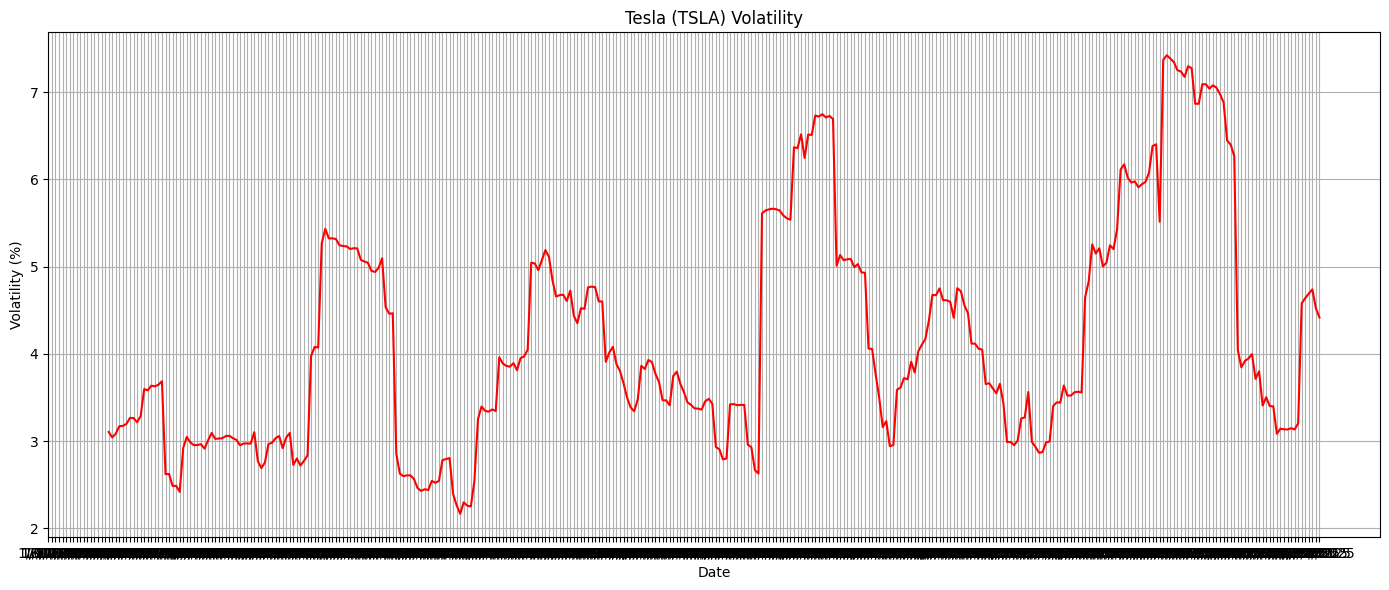

In [318]:
df_tsla['Daily Return'] = df_tsla['Close'].pct_change()

plt.figure(figsize=(14,6))
plt.plot(df_tsla['Date'], df_tsla['Daily Return'], label='Daily Return', color='green')
plt.title('Tesla (TSLA) Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Volatility: rolling std dev
df_tsla['Volatility'] = df_tsla['Daily Return'].rolling(window=21).std() * 100

plt.figure(figsize=(14,6))
plt.plot(df_tsla['Date'], df_tsla['Volatility'], label='21-Day Rolling Volatility (%)', color='red')
plt.title('Tesla (TSLA) Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


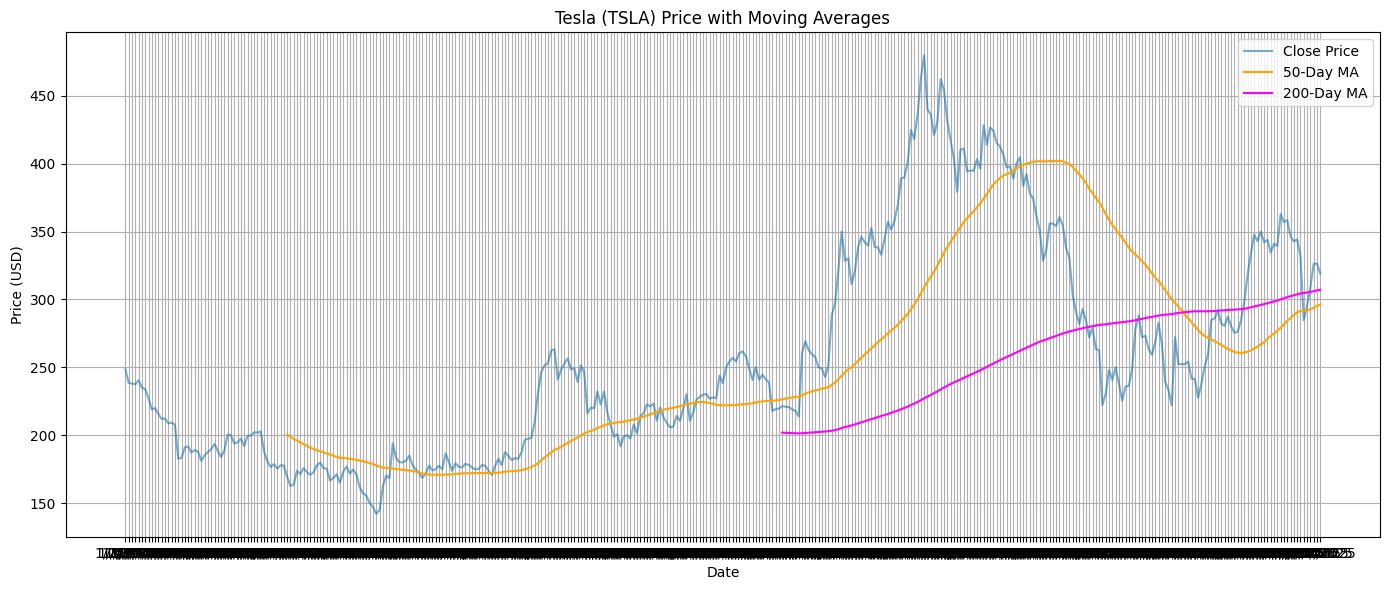

In [319]:
# Moving averages
df_tsla['MA50'] = df_tsla['Close'].rolling(window=50).mean()
df_tsla['MA200'] = df_tsla['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,6))
plt.plot(df_tsla['Date'], df_tsla['Close'], label='Close Price', alpha=0.6)
plt.plot(df_tsla['Date'], df_tsla['MA50'], label='50-Day MA', color='orange')
plt.plot(df_tsla['Date'], df_tsla['MA200'], label='200-Day MA', color='magenta')
plt.title('Tesla (TSLA) Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [320]:
import plotly.graph_objects as go
import plotly.io as pio

# Force Plotly to open chart in browser (avoids nbformat issue)
pio.renderers.default = 'browser'

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df_tsla['Date'],
    open=df_tsla['Open'],
    high=df_tsla['High'],
    low=df_tsla['Low'],
    close=df_tsla['Close'],
    name='TSLA'
)])

# Update chart layout
fig.update_layout(
    title='Tesla (TSLA) Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,
    template='plotly_dark'
)

# Display the chart
fig.show()



In [321]:
fig = go.Figure(data=[go.Candlestick(
    x=df_tsla['Date'],
    open=df_tsla['Open'],
    high=df_tsla['High'],
    low=df_tsla['Low'],
    close=df_tsla['Close'],
    name='TSLA'
)])
fig.update_layout(
    title='Tesla (TSLA) Candlestick Chart - 1 Year',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,
    template='plotly_dark'
)
fig.show()


In [322]:
df_tsla.head()

,Date,Open,High,Low,Close,Volume,Daily Return,Volatility,MA50,MA200
0,1/2/2024,250.08,251.25,244.41,248.42,104654200.0,NaN,NaN,NaN,NaN
1,1/3/2024,244.98,245.68,236.32,238.45,121082600.0,-0.040134,NaN,NaN,NaN
2,1/4/2024,239.25,242.70,237.73,237.93,102629300.0,-0.002181,NaN,NaN,NaN
3,1/5/2024,236.86,240.12,234.90,237.49,92379400.0,-0.001849,NaN,NaN,NaN
4,1/8/2024,236.14,241.25,235.30,240.45,85166600.0,0.012464,NaN,NaN,NaN


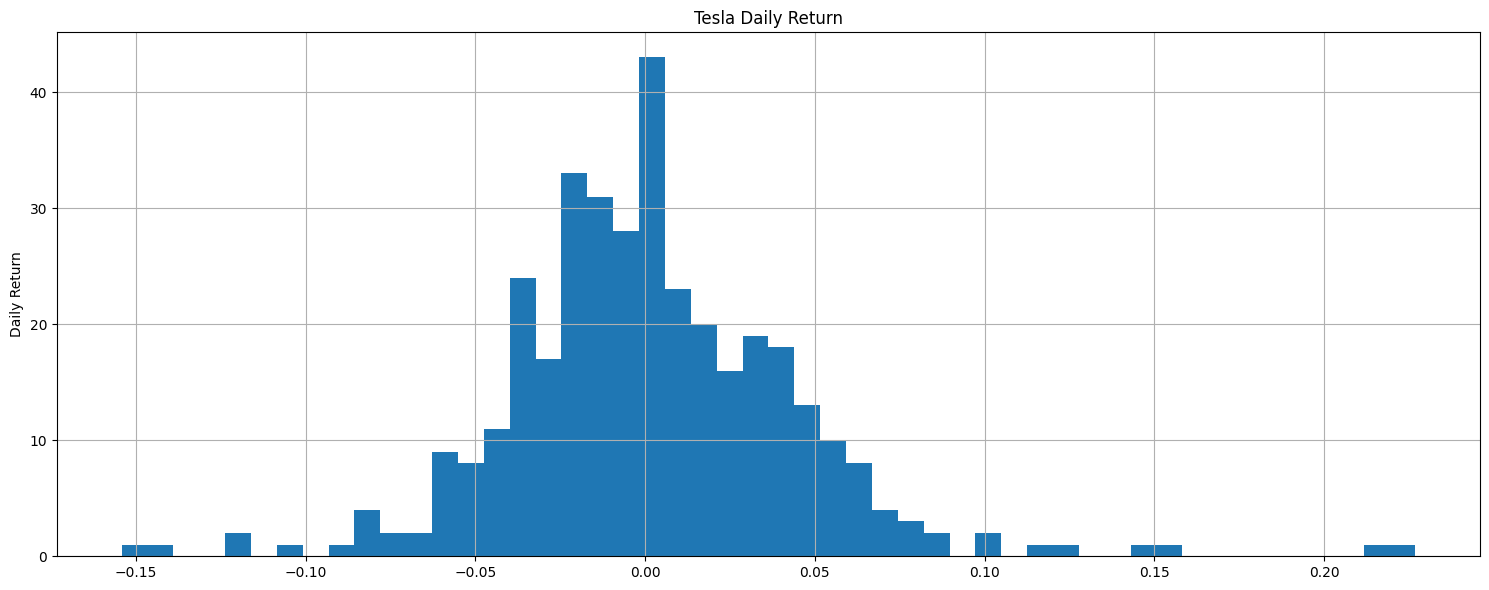

In [323]:
plt.figure(figsize=(15, 6))
df_tsla['Close'].pct_change().hist(bins=50)
plt.ylabel("Daily Return")
plt.title("Tesla Daily Return")
plt.tight_layout()
plt.show()

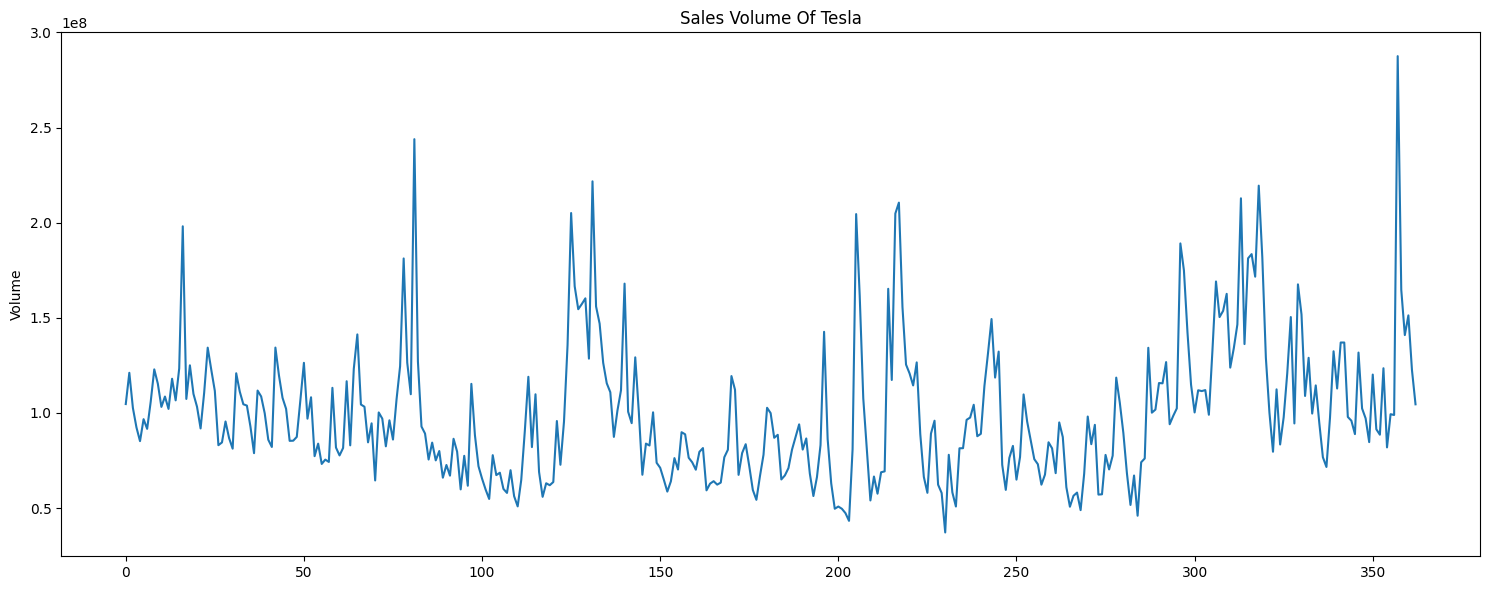

In [324]:
plt.figure(figsize=(15, 6))
df_tsla['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume Of Tesla")
plt.tight_layout()
plt.show()

In [325]:
import yfinance as yf
import pandas as pd

In [326]:
# Download SPY data
df_spy = yf.download('SPY', start='2024-01-01', end='2024-06-01', progress=False).reset_index()



C:\Users\levyc\AppData\Local\Temp\ipykernel_13184\554167288.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True



In [327]:
# Flatten SPY columns from MultiIndex (Price, Ticker) to single-level with 'SPY_' prefix
df_spy.columns = [f"{col[1]}_{col[0]}" if isinstance(col, tuple) else col for col in df_spy.columns]

print(df_spy.columns)  # Should now show ['SPY_Close', 'SPY_High', ...]


Index(['_Date', 'SPY_Close', 'SPY_High', 'SPY_Low', 'SPY_Open', 'SPY_Volume'], dtype='object')


In [328]:
print(df_spy.head())
print(df_spy.columns)


       _Date   SPY_Close    SPY_High     SPY_Low    SPY_Open  SPY_Volume
0 2024-01-02  465.264343  466.268424  463.138092  464.782010   123623700
1 2024-01-03  461.464691  463.827183  460.854384  463.079049   103585900
2 2024-01-04  459.978210  463.600699  459.751794  460.982261    84232200
3 2024-01-05  460.608246  463.088857  459.141508  460.184942    86060800
4 2024-01-08  467.183899  467.331549  460.982325  461.110298    74879100
Index(['_Date', 'SPY_Close', 'SPY_High', 'SPY_Low', 'SPY_Open', 'SPY_Volume'], dtype='object')


In [329]:
df_tsla.head()

,Date,Open,High,Low,Close,Volume,Daily Return,Volatility,MA50,MA200
0,1/2/2024,250.08,251.25,244.41,248.42,104654200.0,NaN,NaN,NaN,NaN
1,1/3/2024,244.98,245.68,236.32,238.45,121082600.0,-0.040134,NaN,NaN,NaN
2,1/4/2024,239.25,242.70,237.73,237.93,102629300.0,-0.002181,NaN,NaN,NaN
3,1/5/2024,236.86,240.12,234.90,237.49,92379400.0,-0.001849,NaN,NaN,NaN
4,1/8/2024,236.14,241.25,235.30,240.45,85166600.0,0.012464,NaN,NaN,NaN


In [330]:
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          363 non-null    object 
 1   Open          363 non-null    float64
 2   High          363 non-null    float64
 3   Low           363 non-null    float64
 4   Close         363 non-null    float64
 5   Volume        363 non-null    float64
 6   Daily Return  362 non-null    float64
 7   Volatility    342 non-null    float64
 8   MA50          314 non-null    float64
 9   MA200         164 non-null    float64
dtypes: float64(9), object(1)
memory usage: 28.5+ KB


In [331]:
df_spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   _Date       105 non-null    datetime64[ns]
 1   SPY_Close   105 non-null    float64       
 2   SPY_High    105 non-null    float64       
 3   SPY_Low     105 non-null    float64       
 4   SPY_Open    105 non-null    float64       
 5   SPY_Volume  105 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 5.0 KB


In [332]:
df_tsla.drop(columns=['MA50', 'MA200'], inplace=True)


We’re trying to predict Tesla stock behavior, but Tesla doesn’t operate in a vacuum — it's affected by the broader market.

So we merge Tesla data with SPY (S&P 500 ETF) data to bring in that external market context on the same dates.

In [333]:
# Rename _Date to Date in df_spy
df_spy.rename(columns={'_Date': 'Date'}, inplace=True)

df_tsla['Date'] = pd.to_datetime(df_tsla['Date'])
df_spy['Date'] = pd.to_datetime(df_spy['Date'])

# Merge on the common 'Date' column
df_merged = pd.merge(
    df_tsla[['Date', 'Close']],
    df_spy[['Date', 'SPY_Close']],
    on='Date'
)

df_merged.head()


,Date,Close,SPY_Close
0,2024-01-02,248.42,465.264343
1,2024-01-03,238.45,461.464691
2,2024-01-04,237.93,459.978210
3,2024-01-05,237.49,460.608246
4,2024-01-08,240.45,467.183899


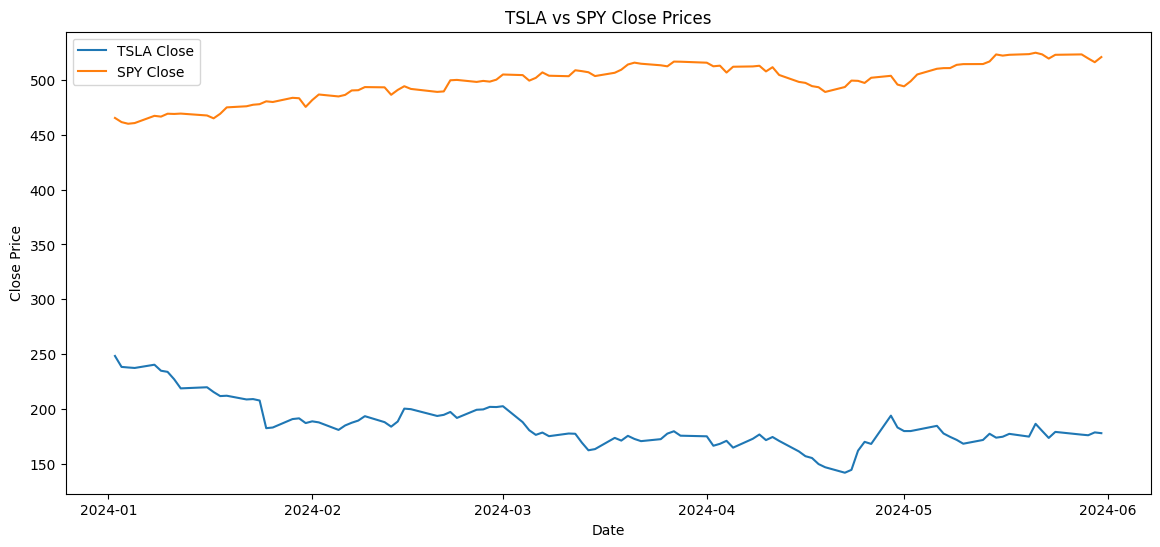

In [334]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_merged['Date'], df_merged['Close'], label='TSLA Close')
plt.plot(df_merged['Date'], df_merged['SPY_Close'], label='SPY Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TSLA vs SPY Close Prices')
plt.legend()
plt.show()


In [335]:
corr = df_merged['Close'].corr(df_merged['SPY_Close'])
print(f"Correlation between TSLA and SPY closing prices: {corr:.4f}")


Correlation between TSLA and SPY closing prices: -0.7046


In [336]:
df_merged['TSLA_Return'] = df_merged['Close'].pct_change()
df_merged['SPY_Return'] = df_merged['SPY_Close'].pct_change()


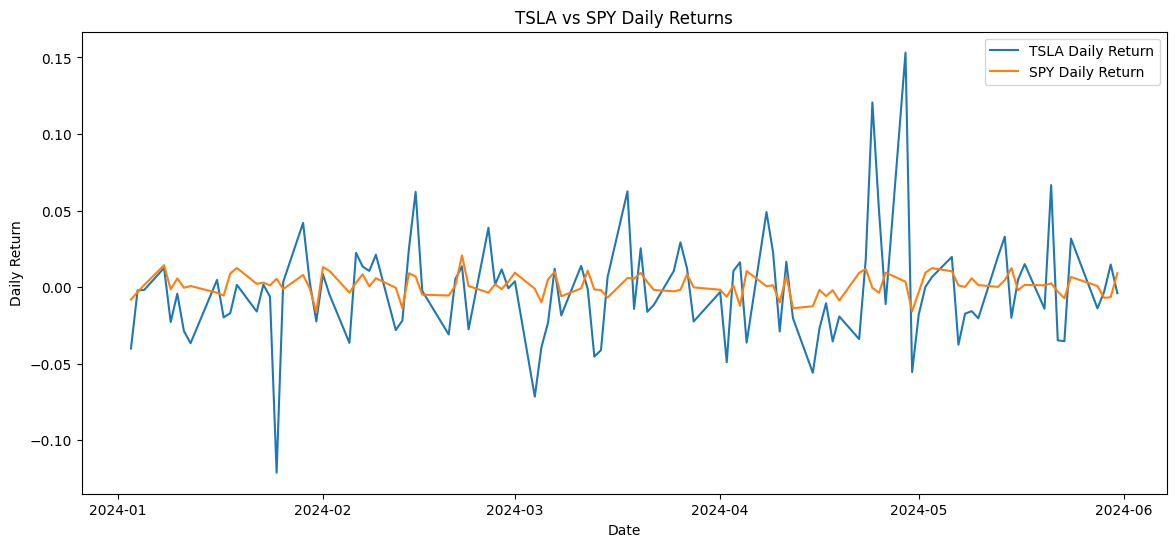

In [337]:
plt.figure(figsize=(14,6))
plt.plot(df_merged['Date'], df_merged['TSLA_Return'], label='TSLA Daily Return')
plt.plot(df_merged['Date'], df_merged['SPY_Return'], label='SPY Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('TSLA vs SPY Daily Returns')
plt.legend()
plt.show()


## Linear Regression

In [338]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [339]:
# Drop NaN returns if needed
df_model = df_merged.dropna(subset=['Close', 'SPY_Close'])

X = df_model[['SPY_Close']].values  # Predictor
y = df_model['Close'].values   # Target



In [340]:
model = LinearRegression()
model.fit(X, y)

print(f"Model coefficient: {model.coef_[0]:.4f}")
print(f"Model intercept: {model.intercept_:.4f}")



Model coefficient: -0.8737
Model intercept: 620.8143


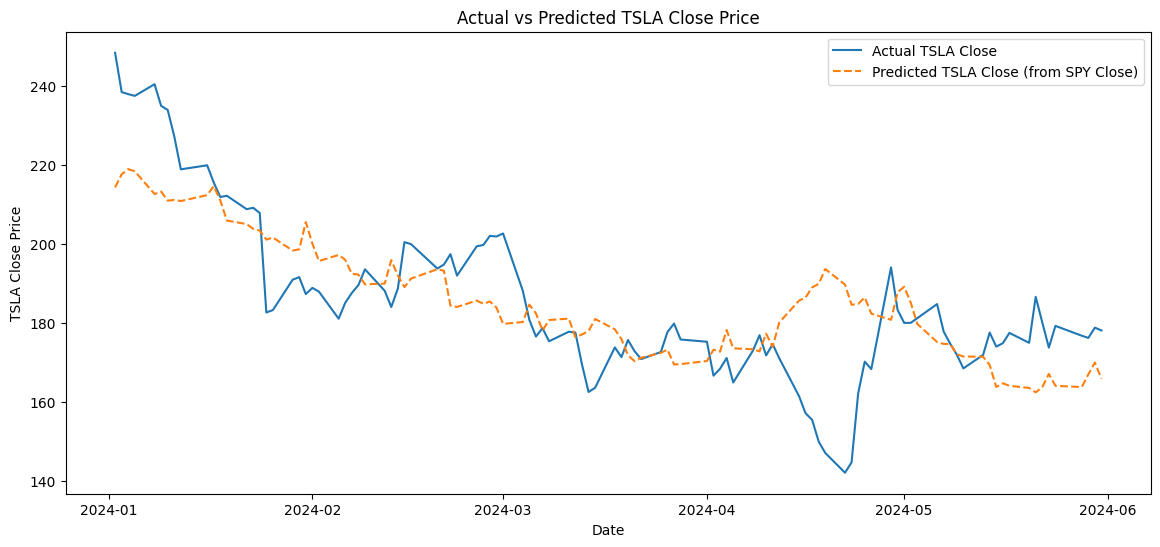

In [341]:
# Predict TSLA Close from SPY Close
y_pred = model.predict(X)

# Plot actual vs predicted TSLA Close
plt.figure(figsize=(14,6))
plt.plot(df_model['Date'], y, label='Actual TSLA Close')
plt.plot(df_model['Date'], y_pred, label='Predicted TSLA Close (from SPY Close)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('TSLA Close Price')
plt.title('Actual vs Predicted TSLA Close Price')
plt.legend()
plt.show()

## Scaling the Data

In [342]:
print(df_tsla.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return',
       'Volatility'],
      dtype='object')


In [343]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming df['Close'] exists
close_prices = df_tsla['Close'].values.reshape(-1, 1)

# Scale prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)


## train-test

In [344]:
# Split data into train and test
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [345]:
# Function to create sequences and targets
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create train sequences
X_train, y_train = create_sequences(train_data)

# Create test sequences
X_test, y_test = create_sequences(test_data)

# Reshape inputs to 3D array for LSTM: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## LSTM Model

In [346]:
## LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [347]:
model = Sequential()

# First LSTM layer with dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))




C:\Users\levyc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [348]:
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))



In [349]:
# Output layer
model.add(Dense(units=1))  # Predicting a single value (next price)

In [350]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate on test data
predicted_prices = model.predict(X_test)

# Optionally, inverse transform the predicted values back to original scale
# Assuming you have a scaler fitted (e.g. MinMaxScaler) called 'scaler'
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1,1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 0.0960 - val_loss: 0.0273
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0213 - val_loss: 0.0061
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0135 - val_loss: 0.0065
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0090 - val_loss: 0.0299
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0098 - val_loss: 0.0210
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0072 - val_loss: 0.0100
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0072 - val_loss: 0.0207
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0065 - val_loss: 0.0132
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0074 - val_loss: 0.0170
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0076 - val_loss: 0.0164
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0060 - val_loss: 0.0124
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0062 - val_loss: 0.0

Mean Squared Error (MSE): 666.9359838279361
Mean Absolute Error (MAE): 17.4835635141226


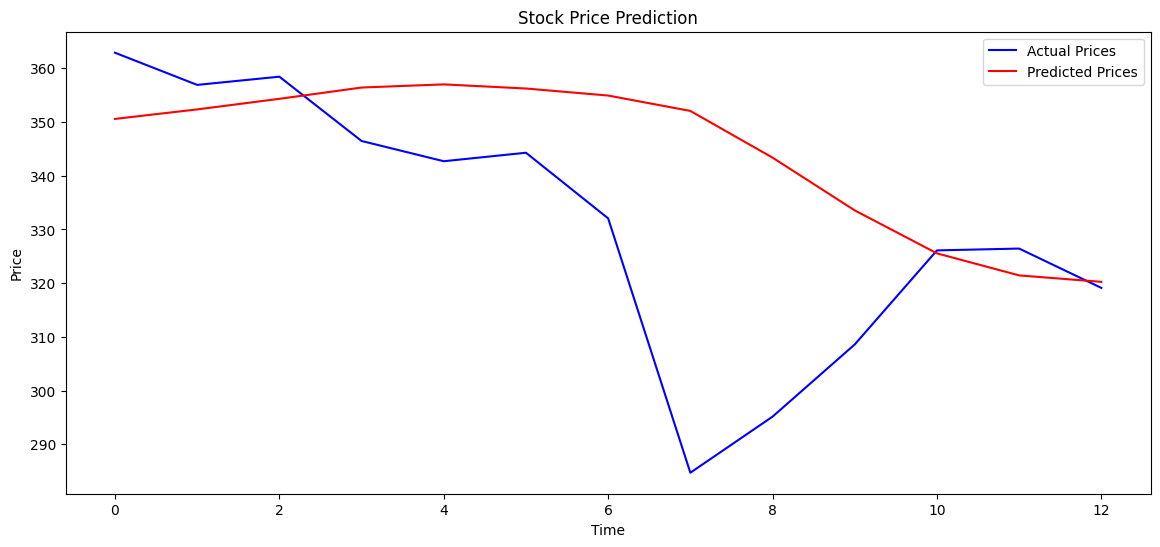

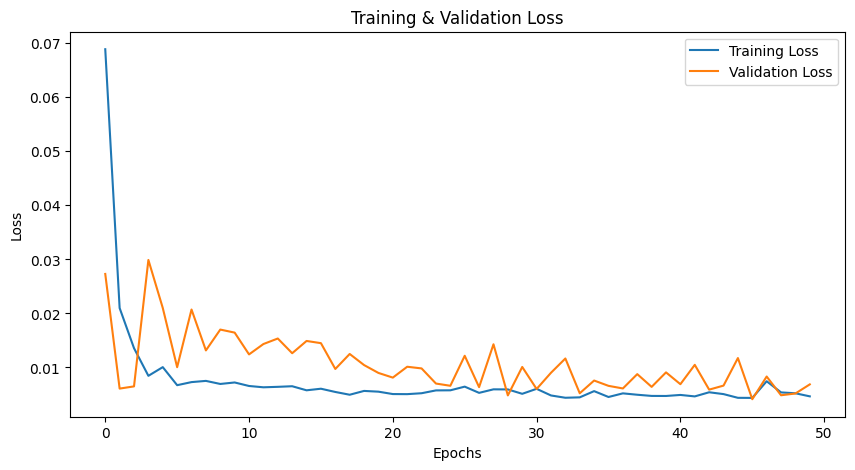

In [351]:
# Calculate performance metrics
mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(14,6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot training & validation loss curves to check for overfitting
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [352]:
# Early stopping to stop training when val_loss stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Save the best model based on validation loss
checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True)


In [353]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint]
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0048

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0050

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0048

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0049 - val_loss: 0.0075
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0047 - val_loss: 0.0052
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0048 - val_loss: 0.0079
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0043 - val_loss: 0.0078


In [354]:
results_df = pd.DataFrame({
    'Actual': actual_prices.flatten(),
    'Predicted': predicted_prices.flatten()
})

results_df.to_csv('tsla_lstm_predictions.csv', index=False)
print("Predictions saved to 'tsla_lstm_predictions.csv'")


Predictions saved to 'tsla_lstm_predictions.csv'


## Predict Future Days

In [355]:
def forecast_next_days(model, last_sequence, days, scaler):
    sequence = last_sequence.copy()
    predictions = []

    for _ in range(days):
        # Predict next price
        pred = model.predict(sequence.reshape(1, sequence.shape[0], 1), verbose=0)
        predictions.append(pred[0][0])

        # Update sequence with new prediction (1 feature only)
        new_entry = np.array([pred[0][0]])  # Only TSLA_Close
        sequence = np.append(sequence[1:], [new_entry], axis=0)

    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


In [356]:
print("X_test shape:", X_test.shape)


X_test shape: (13, 60, 1)


In [357]:
# Use the last sequence in the test set
future_preds = forecast_next_days(model, X_test[-1], days=7, scaler=scaler)

# Print predicted prices for the next 7 days
print("Next 7 day TSLA price predictions:")
print(future_preds.flatten())


Next 7 day TSLA price predictions:
[305.69705 304.80212 303.8789  302.9729  302.10858 301.29633 300.53656]


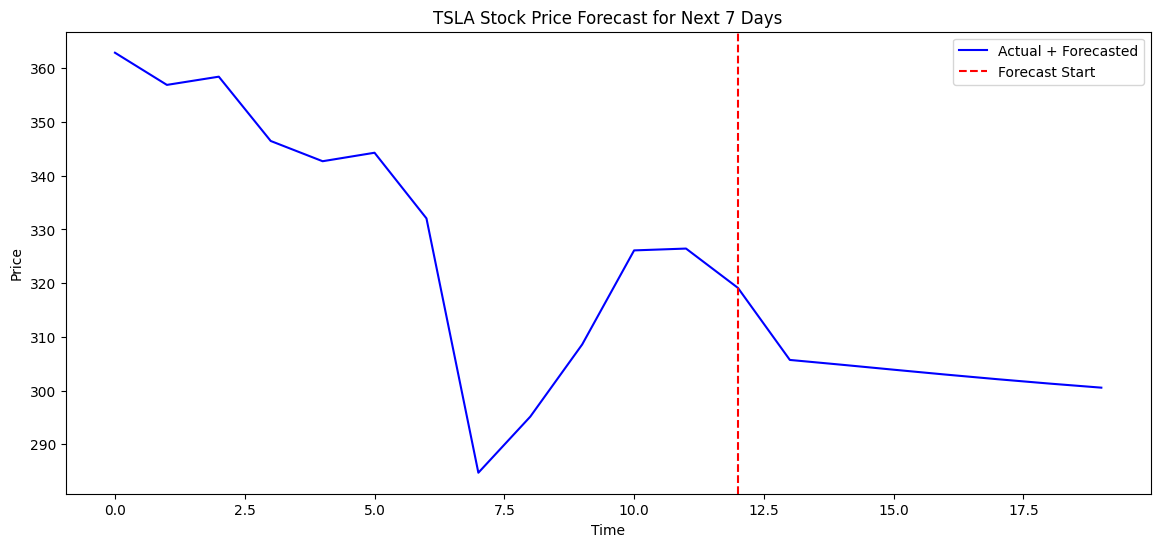

In [358]:
# Combine actual and predicted for context
full_series = np.concatenate((actual_prices.flatten(), future_preds.flatten()))

plt.figure(figsize=(14,6))
plt.plot(full_series, label='Actual + Forecasted', color='blue')
plt.axvline(x=len(actual_prices)-1, color='red', linestyle='--', label='Forecast Start')
plt.title('TSLA Stock Price Forecast for Next 7 Days')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
